In [1]:
# Importing the necessary libraries :
    
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Suryaditya\Desktop\AnalytixLabs\TSF\Global Terrorism\globalterrorismdb_0718dist.csv', encoding='latin1')
df.shape

C:\Users\Suryaditya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(181691, 135)

In [4]:
df.columns.values 

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
df.isnull().sum()
#certain columns have a lot of missing values.

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

#### Though the data has 135 columns, there are many columns which have more than 60% of data missing. We will remove these rows since they will not add much to our data exploration.

In [6]:
df = df.replace(['',' ','NULL'], np.nan)  #replacing all missing values and NULL with NaN
df = df.dropna(thresh=df.shape[0]*0.6, how='all', axis=1) # dropping all columns with Nan>60%
df.shape

(181691, 58)

#### So from 135 columns we now have 58.

In [7]:
# Upon further analysis we remove some more columns and rename them.
df.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 'crit3':'Crit3', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty1_txt':'Natlty1', 'gname':'Gname', 
                          'guncertain1':'Guncertain1', 'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'nkill':'Nkill',
                          'nwound':'Nwound', 'attacktype1_txt':'Attacktype'}, inplace=True)

#Keep 20 columns
df = df[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [8]:
df.columns.values  # final list of columns for our analysis.

array(['Eventid', 'Year', 'Country', 'Region', 'Provstate', 'City',
       'Crit1', 'Crit2', 'Crit3', 'Success', 'Suicide', 'Attacktype',
       'Targtype', 'Natlty1', 'Gname', 'Guncertain1', 'Claimed',
       'Weaptype', 'Nkill', 'Nwound'], dtype=object)

In [9]:
# Add column Damage (Number of Dead/Injured people) by adding Nkill and Nwound :
df['Damage']=df['Nkill']+df['Nwound']

In [10]:
df.isnull().sum()

Eventid            0
Year               0
Country            0
Region             0
Provstate        421
City             434
Crit1              0
Crit2              0
Crit3              0
Success            0
Suicide            0
Attacktype         0
Targtype           0
Natlty1         1559
Gname              0
Guncertain1      380
Claimed        66120
Weaptype           0
Nkill          10313
Nwound         16311
Damage         16874
dtype: int64

In [11]:
# Replacing the NaN values of numeric columns with zero :
df[['Nkill','Nwound','Damage','Claimed','Guncertain1']] = df[['Nkill','Nwound','Damage','Claimed','Guncertain1']].fillna(0)

In [12]:
df.head()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,...,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound,Damage
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,...,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,0.0,Unknown,1.0,0.0,1.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,...,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,0.0,Unknown,0.0,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,...,Assassination,Journalists & Media,United States,Unknown,0.0,0.0,Unknown,1.0,0.0,1.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,...,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,0.0,Explosives,0.0,0.0,0.0
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,...,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,0.0,Incendiary,0.0,0.0,0.0


In [13]:
df.dtypes

Eventid          int64
Year             int64
Country         object
Region          object
Provstate       object
City            object
Crit1            int64
Crit2            int64
Crit3            int64
Success          int64
Suicide          int64
Attacktype      object
Targtype        object
Natlty1         object
Gname           object
Guncertain1    float64
Claimed        float64
Weaptype        object
Nkill          float64
Nwound         float64
Damage         float64
dtype: object

In [14]:
df.Country.nunique()
# We have 205 countries mentioned here in the dataframe.

205

In [15]:
df.Country.value_counts()

Iraq                              24636
Pakistan                          14368
Afghanistan                       12731
India                             11960
Colombia                           8306
Philippines                        6908
Peru                               6096
El Salvador                        5320
United Kingdom                     5235
Turkey                             4292
Somalia                            4142
Nigeria                            3907
Thailand                           3849
Yemen                              3347
Spain                              3249
Sri Lanka                          3022
United States                      2836
Algeria                            2743
France                             2693
Egypt                              2479
Lebanon                            2478
Chile                              2365
Libya                              2249
West Bank and Gaza Strip           2227
Syria                              2201


#### Top 15 Countries with maximum reported crimes are :
##### Iraq>>Pakistan>>Afghanistan>>India>>Colombia>>
##### Philippines>>Peru>>El Salvador>>United Kingdom>>Turkey>>
##### Somalia>>Nigeria>>Thailand>>Yemen>>Spain

In [16]:
# FYI :
print('Country with the highest number of Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Region with the highest number of  Terrorist Attacks:',df['Region'].value_counts().index[0])

Country with the highest number of Terrorist Attacks: Iraq
Region with the highest number of  Terrorist Attacks: Middle East & North Africa


#### Top 10 Countries with minimun reported crimes  from 2000 to 2017 are :

In [17]:
country_damage = df[df['Year'] > 1999][["Country", "Damage"]].groupby('Country',as_index=False).sum()
country_damage[country_damage["Damage"]==0]

,Country,Damage
9,Bahamas,0.0
14,Belize,0.0
34,Cyprus,0.0
64,Iceland,0.0
105,New Zealand,0.0
117,Portugal,0.0
129,Slovenia,0.0
139,Swaziland,0.0
147,Togo,0.0
160,Vietnam,0.0


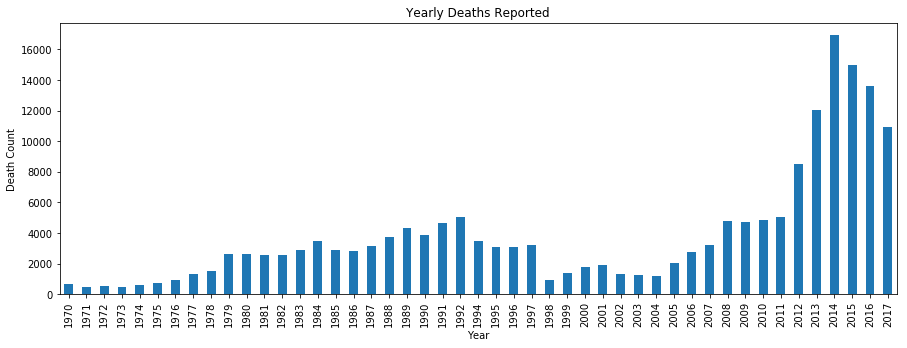

In [18]:
df.groupby('Year')['Damage'].count().plot.bar()
plt.gcf().set_size_inches(15, 5)
plt.title('Yearly Deaths Reported')
plt.xlabel('Year')
plt.ylabel('Death Count')
plt.show()

#### This graph shows the number of dead/injured people by year from 1970 to 2017. The number of dead/injured people increases, specially from 2012 to 2015. The year 2015 had nearly 17000 reported deaths/injuries.

In [19]:
df['Attacktype'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64

In [20]:
df['Attacktype'] = df['Attacktype'].replace('Hostage Taking .*','Hostage Taking', regex=True)
df['Attacktype'] = df['Attacktype'].replace('Hostage Taking .*','Hostage Taking', regex=True)
attack_type = df['Attacktype'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                            'Hostage Taking',
                                                            'Facility/Infrastructure Attack'] else 'Others')

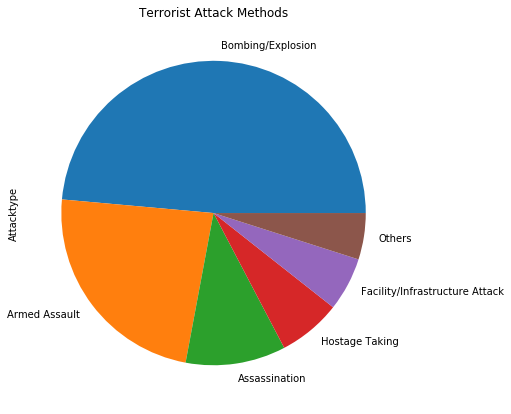

In [21]:
attack_type.value_counts().plot.pie()
plt.gcf().set_size_inches(7, 7)
plt.title('Terrorist Attack Methods')
plt.show()

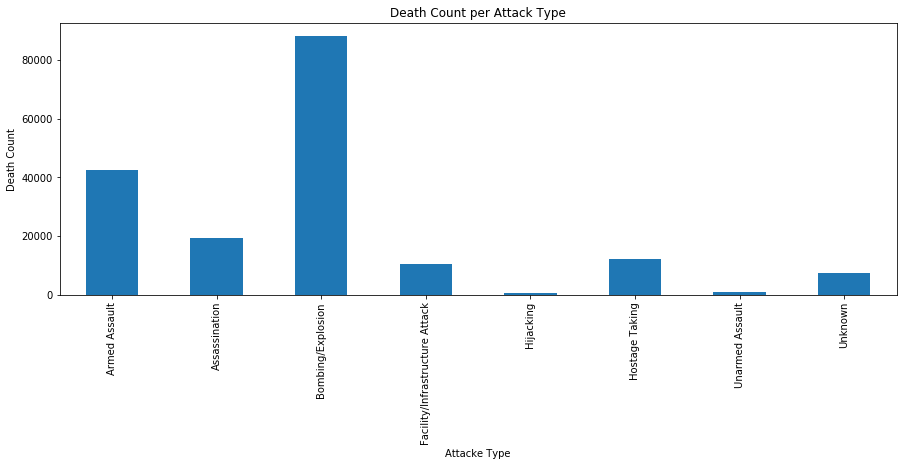

In [22]:
df.groupby('Attacktype')['Damage'].count().plot.bar()
plt.gcf().set_size_inches(15, 5)
plt.title('Death Count per Attack Type')
plt.xlabel('Attacke Type')
plt.ylabel('Death Count')
plt.show()

#### From the above two graphs we see that Bombing/Explosion has been reported the most and has claimed the most lives.

In [23]:
weapontype =df['Weaptype'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown','Incendiary'] 
                                   else 'Others')

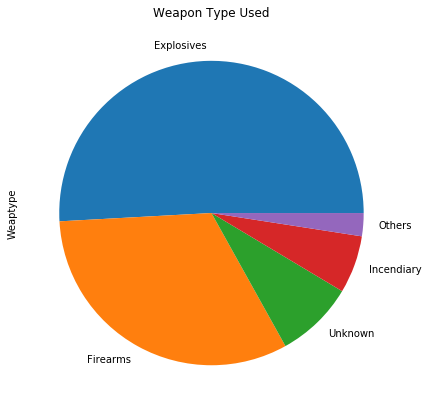

In [24]:
weapontype.value_counts().plot.pie()
plt.gcf().set_size_inches(7, 7)
plt.title('Weapon Type Used')
plt.show()

#### Since Bombing/Explosion has been the most reported attack type, explosives are the most used weapon.
#### Similarly since Armed Assault comes next, so is the use to firearms the second most used weapon type.

In [25]:
df1 = df[["Country", "Damage"]].loc[(df['Suicide'] == 1)]
df1.groupby(["Country"]).size().sort_values(ascending=False).head(20)

# Top 20 countries with highest deaths due to suicide bombings.

Country
Iraq                        2602
Afghanistan                 1228
Pakistan                     511
Nigeria                      389
Syria                        344
Yemen                        220
Somalia                      188
Israel                       130
Sri Lanka                    114
Libya                        109
Cameroon                      88
Russia                        86
Turkey                        76
West Bank and Gaza Strip      66
Lebanon                       65
Egypt                         62
India                         60
Algeria                       33
Mali                          32
Saudi Arabia                  25
dtype: int64